# 大數據分析的基礎

在本次課程中，我們將說明資料分析的基礎工作，也就是(1)載入分析所需的套件、(2)讀入資料、(3)基本的資料處理以及(4)視覺化。我們將以[120年的奧運選手資料集athlete_events.csv與noc_regions.csv](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results)檔案為例，說明上述的觀念與實際操作。

## 載入分析所需的套件

一般來說，我們要處理的資料大多是結構式資料(structural data)，也就是具有欄位型式的資料表，資料表中包含多個欄位，每一筆記錄由它們對應到各欄位的資料構成。python程式大多用套件pandas來讀入與處理結構式資料，視覺化則需要matplotlib和seaborn套件，另外numpy則是用來處理數值資料。因此，首先要安裝與載入這四個套件。由於我們使用的Anaconda已經事先安裝好了這四個套件，所以只要直接載入就可以了。

In [1]:
# 載入資料處理與視覺化所需套件
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## 讀入資料

### 讀入資料

pandas 可以支援多種文字、二進位檔案與資料庫的資料載入，常見的 txt、csv、excel 試算表與MySQL。從Kaggle取得的奧運資料為csv檔案，可以利用pandas提供的read_csv()方法將資料從檔案讀取成為pandas的資料結構--資料框(data frame)。

In [2]:
# 讀入資料檔
data = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

### 查看資料框

pandas提供若干種瀏覽、檢閱資料框的方式，讓使用者在處理資料前，先對資料有大概的了解。

1. head(n)：查看前n筆資料，如果沒有輸入n，則為前5筆

In [3]:
data.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


注意： python的資料編號為從0開始。

athlete_events的資料共有15個欄位。

- ID - 每個運動員的編號。
- Name - 運動員的名字。
- Sex - 性別。
- Age - 年齡。
- Height - 身高(以公分計)。
- Weight - 體重(以公斤計)。
- Team - 參賽隊名。
- NOC - 國家奧委會(3-letter code)。
- Games - 參加的奧運(包括年與季)。
- Year - 參加年。
- Season - 參加季(Summer 或 Winter)。
- City - 主辦城市。
- Sport - 運動種類。
- Event - 運動項目。
- Medal - 獎牌(Gold, Silver, Bronze, or NA)。

2. 資料的數量、規模

In [4]:
data.shape

(271116, 15)

共有271116筆資料，15個欄位。

3. 資料型態與包含的值

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


資料的型態為數值者共有5個，其中2個為整數(ID, Year)，3個為浮點數(Age, Height, Weight)，其它為文字。

缺少資料者，共有Age, Height, Weight和Medal，其中Medal缺少最多。

4. 數值型欄位的統計描述

In [6]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


從資料的統計來看，年齡最小者為10歲，最大者為97歲。(請補充其它欄位的說明)

5. regions的前5筆資料

In [7]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


接下來，請運用上面介紹的方式查看regions資料集的數量、規模以及各欄位的資料型態與包含的值

6. 合併運動員資料和regions資料

In [8]:
data = data.merge(regions, how="left", on=["NOC"])
# 查看合併後的前五筆運動員資料
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


##  資料處理

### 選取符合條件的資料紀錄

pandas在資料框中透過**布林判斷條件**篩選出符合條件的紀錄

1. 選取金牌選手

In [9]:
data[data.Medal=="Gold"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold,Georgia,NaN
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold,Germany,NaN
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold,Netherlands,NaN
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold,Netherlands,NaN


2. 選取臺灣選手

In [10]:
data[data.region=="Taiwan"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
12572,6850,Bai Hui-Yun,F,23.0,157.0,48.0,Chinese Taipei-1,TPE,1996 Summer,1996,Summer,Atlanta,Table Tennis,Table Tennis Women's Doubles,NaN,Taiwan,NaN
22826,12002,Mackenzie Blackburn,M,21.0,NaN,NaN,Chinese Taipei,TPE,2014 Winter,2014,Winter,Sochi,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,NaN,Taiwan,NaN
22827,12002,Mackenzie Blackburn,M,21.0,NaN,NaN,Chinese Taipei,TPE,2014 Winter,2014,Winter,Sochi,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",NaN,Taiwan,NaN
38281,19674,Chan Fai-Hung,M,28.0,171.0,61.0,Chinese Taipei,TPE,1960 Summer,1960,Summer,Roma,Football,Football Men's Football,NaN,Taiwan,NaN
38282,19675,Chan Hao-Ching,F,22.0,175.0,60.0,Chinese Taipei,TPE,2016 Summer,2016,Summer,Rio de Janeiro,Tennis,Tennis Women's Doubles,NaN,Taiwan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266664,133400,Yuan Shu-Chi,F,19.0,168.0,62.0,Chinese Taipei,TPE,2004 Summer,2004,Summer,Athina,Archery,Archery Women's Individual,NaN,Taiwan,NaN
266665,133400,Yuan Shu-Chi,F,19.0,168.0,62.0,Chinese Taipei,TPE,2004 Summer,2004,Summer,Athina,Archery,Archery Women's Team,Bronze,Taiwan,NaN
266666,133400,Yuan Shu-Chi,F,23.0,168.0,62.0,Chinese Taipei,TPE,2008 Summer,2008,Summer,Beijing,Archery,Archery Women's Individual,NaN,Taiwan,NaN
266667,133400,Yuan Shu-Chi,F,23.0,168.0,62.0,Chinese Taipei,TPE,2008 Summer,2008,Summer,Beijing,Archery,Archery Women's Team,NaN,Taiwan,NaN


3. 選取臺灣的金牌選手

In [11]:
data[(data.region=="Taiwan") & (data.Medal=="Gold")]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
39384,20263,Chen Shih-Hsien,F,25.0,166.0,46.0,Chinese Taipei,TPE,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Flyweight,Gold,Taiwan,NaN
41413,21359,Chu Mu-Yen,M,22.0,175.0,58.0,Chinese Taipei,TPE,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Men's Flyweight,Gold,Taiwan,NaN
99899,50545,Hsu Shu-Ching,F,25.0,160.0,53.0,Chinese Taipei,TPE,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Featherweight,Gold,Taiwan,NaN


& 是布林邏輯運算式的"且"， | 則是 "或"

### 選取資料中的某些欄位

pandas在資料框中利用**以欄位名稱形成的list**指定選取的欄位

1. 所有選手的姓名

In [12]:
data[["Name"]]

,Name
0,A Dijiang
1,A Lamusi
2,Gunnar Nielsen Aaby
3,Edgar Lindenau Aabye
4,Christine Jacoba Aaftink
...,...
271111,Andrzej ya
271112,Piotr ya
271113,Piotr ya
271114,Tomasz Ireneusz ya


2. 所有選手的姓名與獎牌

In [13]:
data[["Name", "Medal"]]

,Name,Medal
0,A Dijiang,NaN
1,A Lamusi,NaN
2,Gunnar Nielsen Aaby,NaN
3,Edgar Lindenau Aabye,Gold
4,Christine Jacoba Aaftink,NaN
...,...,...
271111,Andrzej ya,NaN
271112,Piotr ya,NaN
271113,Piotr ya,NaN
271114,Tomasz Ireneusz ya,NaN


3. 臺灣選手的姓名與獎牌

In [14]:
data[data.region=="Taiwan"][["Name", "Medal"]]

,Name,Medal
12572,Bai Hui-Yun,NaN
22826,Mackenzie Blackburn,NaN
22827,Mackenzie Blackburn,NaN
38281,Chan Fai-Hung,NaN
38282,Chan Hao-Ching,NaN
...,...,...
266664,Yuan Shu-Chi,NaN
266665,Yuan Shu-Chi,Bronze
266666,Yuan Shu-Chi,NaN
266667,Yuan Shu-Chi,NaN


### 依照某些欄位上的值排列資料(排序)

pandas的方法sort_values(\["X"\])可以按照欄位X上的值排列資料

1. 依據選手參加的年份由小到大排列紀錄

In [15]:
data.sort_values(by=["Year"])

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
214333,107607,Fritz Richard Gustav Schuft,M,19.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,NaN,Germany,NaN
244717,122526,Pierre Alexandre Tuffri,M,19.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Triple Jump,Silver,France,NaN
244716,122526,Pierre Alexandre Tuffri,M,19.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Long Jump,NaN,France,NaN
23912,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,NaN,Germany,NaN
23913,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Germany,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142355,71419,Luis Fernando Lpez Erazo,M,37.0,166.0,60.0,Colombia,COL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,NaN,Colombia,NaN
47729,24610,Enrico D'Aniello,M,20.0,152.0,53.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxed Eights,NaN,Italy,NaN
47728,24609,Sabrina D'Angelo,F,23.0,173.0,71.0,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Women's Football,Bronze,Canada,NaN
47746,24621,Andrea Mitchell D'Arrigo,M,21.0,194.0,85.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 200 metres Freestyle,NaN,Italy,NaN


2. 依據選手參加的年份由大到小排列紀錄

In [16]:
data.sort_values(by=["Year"], ascending=[False])

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
198703,99780,Maximilian Reinelt,M,27.0,195.0,98.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxed Eights,Silver,Germany,NaN
90507,45859,Sophie Elizabeth Hansson,F,18.0,186.0,74.0,Sweden,SWE,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 100 metres Breaststroke,NaN,Sweden,NaN
111165,56244,Arsen Julfalakyan,M,29.0,166.0,76.0,Armenia,ARM,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",NaN,Armenia,NaN
82309,41810,Lalonde Keida Gordon,M,27.0,179.0,83.0,Trinidad and Tobago,TTO,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 400 metres Relay,NaN,Trinidad,Trinidad and Tobago
82308,41810,Lalonde Keida Gordon,M,27.0,179.0,83.0,Trinidad and Tobago,TTO,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN,Trinidad,Trinidad and Tobago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115559,58546,Gyula Kellner,M,24.0,NaN,NaN,Hungary,HUN,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Marathon,Bronze,Hungary,NaN
97183,49185,Fritz Hofmann,M,24.0,167.0,56.0,Germany,GER,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's High Jump,NaN,Germany,NaN
258338,129362,"Desiderius ""Dezs"" Wein (Boros)",M,23.0,NaN,NaN,Hungary,HUN,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,NaN,Hungary,NaN
258339,129362,"Desiderius ""Dezs"" Wein (Boros)",M,23.0,NaN,NaN,Hungary,HUN,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Hungary,NaN


ascending=True 時；由小到大排列
ascending=False 時；由大到小排列

3. 依據臺灣選手的身高(由大到小)排列紀錄

可以先篩選出符合條件的紀錄，再排列資料

In [17]:
data[data.region=="Taiwan"].sort_values(by=["Height"], ascending=[False])

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
140719,70649,Liu Wei-Ting,M,21.0,196.0,81.0,Chinese Taipei,TPE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Men's Welterweight,NaN,Taiwan,NaN
38445,19770,Chang Ming-Huang,M,29.0,194.0,130.0,Chinese Taipei,TPE,2012 Summer,2012,Summer,London,Athletics,Athletics Men's Shot Put,NaN,Taiwan,NaN
38444,19770,Chang Ming-Huang,M,25.0,194.0,130.0,Chinese Taipei,TPE,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's Shot Put,NaN,Taiwan,NaN
256473,128421,Wang Chien-Ming,M,24.0,190.0,90.0,Chinese Taipei,TPE,2004 Summer,2004,Summer,Athina,Baseball,Baseball Men's Baseball,NaN,Taiwan,NaN
256729,128552,Wang Shao-An,M,19.0,190.0,80.0,Chinese Taipei,TPE,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 50 metres Freestyle,NaN,Taiwan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256584,128474,Wang Jauo-Hueyi,M,22.0,NaN,NaN,Chinese Taipei,TPE,1988 Winter,1988,Winter,Calgary,Bobsleigh,Bobsleigh Men's Four,NaN,Taiwan,NaN
263321,131774,Wu Chun-Tsai,M,NaN,NaN,NaN,Chinese Taipei,TPE,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Men's Triple Jump,NaN,Taiwan,NaN
263474,131839,Wu Yet-An,M,NaN,NaN,NaN,Chinese Taipei,TPE,1956 Summer,1956,Summer,Melbourne,Basketball,Basketball Men's Basketball,NaN,Taiwan,NaN
265049,132633,James Yap,M,NaN,NaN,NaN,Chinese Taipei,TPE,1956 Summer,1956,Summer,Melbourne,Basketball,Basketball Men's Basketball,NaN,Taiwan,NaN


4. 依據臺灣選手的身高(由大到小)與體重(由大到小)排列紀錄

需要依照兩個欄位進行排列時，在by中依序寫出兩個欄位的名稱。

In [18]:
data[data.region=="Taiwan"]\
.sort_values(by=["Height", "Weight"], ascending=[False, False])

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
140719,70649,Liu Wei-Ting,M,21.0,196.0,81.0,Chinese Taipei,TPE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Men's Welterweight,NaN,Taiwan,NaN
38444,19770,Chang Ming-Huang,M,25.0,194.0,130.0,Chinese Taipei,TPE,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's Shot Put,NaN,Taiwan,NaN
38445,19770,Chang Ming-Huang,M,29.0,194.0,130.0,Chinese Taipei,TPE,2012 Summer,2012,Summer,London,Athletics,Athletics Men's Shot Put,NaN,Taiwan,NaN
39382,20262,Chen Shih-Chieh,M,22.0,190.0,150.0,Chinese Taipei,TPE,2012 Summer,2012,Summer,London,Weightlifting,Weightlifting Men's Super-Heavyweight,NaN,Taiwan,NaN
39383,20262,Chen Shih-Chieh,M,26.0,190.0,150.0,Chinese Taipei,TPE,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Super-Heavyweight,NaN,Taiwan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256584,128474,Wang Jauo-Hueyi,M,22.0,NaN,NaN,Chinese Taipei,TPE,1988 Winter,1988,Winter,Calgary,Bobsleigh,Bobsleigh Men's Four,NaN,Taiwan,NaN
263321,131774,Wu Chun-Tsai,M,NaN,NaN,NaN,Chinese Taipei,TPE,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Men's Triple Jump,NaN,Taiwan,NaN
263474,131839,Wu Yet-An,M,NaN,NaN,NaN,Chinese Taipei,TPE,1956 Summer,1956,Summer,Melbourne,Basketball,Basketball Men's Basketball,NaN,Taiwan,NaN
265049,132633,James Yap,M,NaN,NaN,NaN,Chinese Taipei,TPE,1956 Summer,1956,Summer,Melbourne,Basketball,Basketball Men's Basketball,NaN,Taiwan,NaN


如果程式碼太長，可以運用"\\"切截成兩行或以上的程式。

### 修改或增加某些欄位

1. 將選手的身高從公分計算改為從公尺計算

In [19]:
data[["Height"]] = data[["Height"]]/100

In [ ]:
# 查看資料的前五筆是否已經改變
data.head()

2. 計算每位選手的BMI值

pandas的assign()方法可以新增欄位

In [20]:
data = data.assign(BMI = data["Weight"]/np.power(data["Height"], 2.0))

In [21]:
# 查看資料的前五筆是否已經改變
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI
0,1,A Dijiang,M,24.0,1.80,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,24.691358
1,2,A Lamusi,M,23.0,1.70,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,20.761246
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,1.85,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,23.959094


### 分組彙整資料

pandas的groupby()方法可以根據某一個欄位上的值，將紀錄分組。
然後依據某一個欄位，計算每一分組中欄位上的資料數(count())、不重複資料數(nunique())、最大值(max())、最小值(min())、平均數(mean())與總和(sum())

1. 計算每一次奧運參加的運動員人數

In [30]:
'''
以每次奧運分組： groupby(["Games"])
依據運動員名字，計算不重複的次數： [["Name"]].nunique()
'''
data.groupby(["Games"])[["Name"]].nunique().reset_index()

,Games,Name
0,1896 Summer,176
1,1900 Summer,1220
2,1904 Summer,650
3,1906 Summer,841
4,1908 Summer,2024
5,1912 Summer,2409
6,1920 Summer,2675
7,1924 Summer,3256
8,1924 Winter,313
9,1928 Summer,3246


2. 計算每一次夏季奧運臺灣參加的運動員人數

In [29]:
'''
找出紀錄中國家為"Taiwan"，而且賽事季節為"Summer"：
     data[(data.region=="Taiwan") & (data.Season=="Summer")]
以每次奧運分組： groupby("[Games]")
依據運動員名字，計算不重複的次數： [["Name"]].nunique()
'''
data[(data.region=="Taiwan") & (data.Season=="Summer")]\
.groupby(["Games"])[["Name"]].nunique().reset_index()

,Games,Name
0,1956 Summer,20
1,1960 Summer,27
2,1964 Summer,40
3,1968 Summer,43
4,1972 Summer,21
5,1984 Summer,38
6,1988 Summer,61
7,1992 Summer,31
8,1996 Summer,74
9,2000 Summer,55


3. 計算每一次夏季奧運各國獲得的總獎牌數

每次夏季奧運、每一國家，所以groupby()內需要給兩種群集

In [31]:
'''
找出紀錄中賽事季節為"Summer"而且有獲得獎牌(Medal欄位有值)：
     data[(data.Season=="Summer") & (data.Medal.notnull())]
以每次奧運和國家地區分組： groupby(["Games", "region"])
依據比賽項目，計算不重複的次數： [["Event"]].nunique()
'''
data[(data.Season=="Summer") & (data.Medal.notnull())]\
.groupby(["Games", "region"])[["Event"]].nunique().reset_index()

,Games,region,Event
0,1896 Summer,Australia,3
1,1896 Summer,Austria,5
2,1896 Summer,Denmark,6
3,1896 Summer,France,8
4,1896 Summer,Germany,12
...,...,...,...
1259,2016 Summer,Ukraine,11
1260,2016 Summer,United Arab Emirates,1
1261,2016 Summer,Uzbekistan,13
1262,2016 Summer,Venezuela,3


## 資料視覺化

運用matplotlib和seaborn，可以產生種類相當豐富的圖形。

可運用以下的圖形針對各種問題進行資料視覺化

- 直方圖(histogram)： 分布
- 長條圖(bar plot)： 比較、排序
- 線圖(line plot)： 趨勢變化
- 圓餅圖(pie chart)： 組成
- 散佈圖(scatter)： 關連

In [27]:
'''
圖形中有中文字型的問題
參考
https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/359974/
'''
from matplotlib.font_manager import FontProperties

han_font = FontProperties(fname=r"c:/windows/fonts/msjh.ttc", size=14) # 中文字形

In [28]:
'''
設計圖形呈現的外觀風格
'''
sns.set(style="whitegrid")

1. 2016年各國參加奧運的運動員人數分布情形

In [32]:
# 先計算2016年各國參加奧運的運動員人數
'''
找出紀錄中賽事年度為2016： data[data.Season==2016]
以國家地區分組： groupby(["region"])
依據運動員姓名，計算不重複的次數： [["Name"]].nunique()
'''
nathelete_region = data[data.Year==2016].\
groupby(["region"])[["Name"]].nunique().reset_index()

In [33]:
# 查看2016年各國參加奧運的運動員人數的前五筆資料
nathelete_region.head()

,region,Name
0,Afghanistan,3
1,Albania,6
2,Algeria,64
3,American Samoa,4
4,Andorra,4


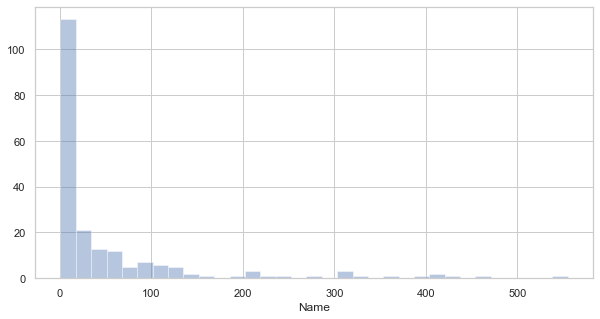

In [34]:
'''
為呈現各國的運動員人數分布情形，可選用直方圖。
seaborn提供的直方圖為distplot
'''
plt.figure(figsize=[10, 5]) #圖的大小
ax = sns.distplot(nathelete_region.Name, kde=False)

([<matplotlib.axis.XTick at 0x579f278>,
 <a list of 13 Text xticklabel objects>)

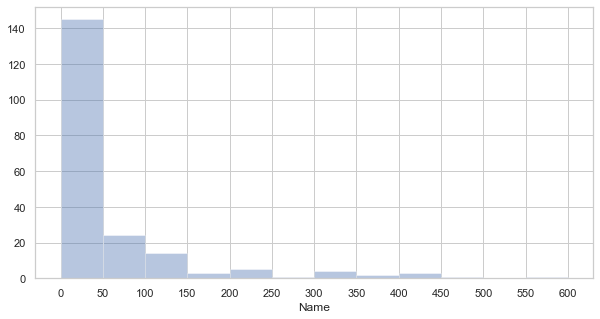

In [35]:
# 將人數分布的區間設為50，最小值為0，最大值為600
plt.figure(figsize=[10, 5])
ax = sns.distplot(nathelete_region["Name"], kde=False, bins=np.arange(0, 650, 50))
plt.xticks(np.arange(0, 650, 50)) # x軸上的刻度

Text(0.5, 1.0, '2016年各國參加奧運的運動員人數分布情形')

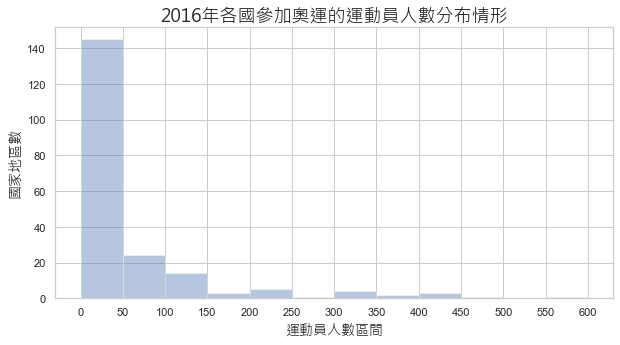

In [36]:
# 加上圖形上的標題
plt.figure(figsize=[10, 5])
ax = sns.distplot(nathelete_region["Name"], kde=False, bins=np.arange(0, 650, 50))
plt.xticks(np.arange(0, 650, 50))
ax.set_xlabel("運動員人數區間", fontproperties=han_font) # x軸的標題，字型選用中文字型
ax.set_ylabel("國家地區數", fontproperties=han_font)
ax.set_title('2016年各國參加奧運的運動員人數分布情形', fontproperties=han_font, fontsize=18)

**練習** 以直方圖呈現「2016年各種運動參加奧運的運動員人數分布情形」
提示：運動員所屬運動的欄位為Sport，依據運動員所屬運動進行分組，然後彙整統計人數

2. 2016年獎牌數最多的前10個國家

In [41]:
# 先計算2016年奧運每個國家得到的獎牌數，並按照獎牌數由大到小排列
'''
找出紀錄中賽事年度為2016而且有獲得獎牌(Medal欄位有值)：
        data[(data.Year==2016) & (data.Medal.notnull())]
以國家地區分組： groupby(["region"])
依據比賽項目，計算不重複的次數： [["Event"]].nunique()
依據比賽項目次數，由大到小排列： sort_values("Event", ascending=False)
'''
medal_country = data[(data.Year==2016) & (data.Medal.notnull())]\
.groupby(["region"])[["Event"]].nunique().reset_index()\
.sort_values("Event", ascending=False)

In [42]:
# 選出前十個國家
medal_country[:10]

,region,Event
79,USA,107
78,UK,63
14,China,61
63,Russia,54
26,France,42
41,Japan,40
28,Germany,40
3,Australia,29
38,Italy,26
13,Canada,22


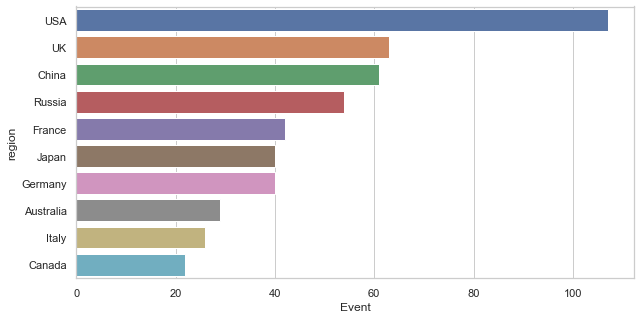

In [39]:
'''
為呈現各國的獲得獎牌數的多少，可選用長條圖。
seaborn提供的長條圖為barplot
barplot中x參數為比賽項目次數，y參數為國家
'''
plt.figure(figsize=[10, 5])
ax = sns.barplot(x="Event", y="region", data=medal_country[:10])

Text(0.5, 1.0, '2016年獎牌數最多的前10個國家')

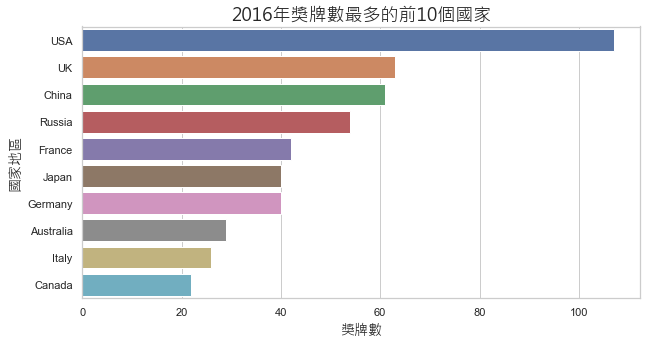

In [40]:
# 加上圖形上的標題
plt.figure(figsize=[10, 5])
ax = sns.barplot(x="Event", y="region", data=medal_country[:10])
ax.set_xlabel("獎牌數", fontproperties=han_font)
ax.set_ylabel("國家地區", fontproperties=han_font)
ax.set_title('2016年獎牌數最多的前10個國家', fontproperties=han_font, fontsize=18)

**練習** 以長條圖呈現「2016年獲得4面獎牌或以上的運動員」
提示：請參考下面的計算運動員獲得獎牌數量的程式

In [43]:
athelete_medal = data[(data.Year==2016) & (data.Medal.notnull())]\
.groupby(["Name"])[["Event"]].count().reset_index()\
.sort_values(["Event"], ascending=False)

3. 每一次夏季奧運會的運動員人數變化

In [66]:
# 先計算每一次夏季奧運會的運動員人數
'''
找出紀錄中賽事季節為"Summer"： data[data.Season=="Summer"]
以賽事年度分組： groupby(["Year"])
依據運動員姓名，計算不重複的次數： [["Name"]].nunique()
'''
nathlete_year = data[data.Season=="Summer"].\
groupby(["Year"])[["Name"]].nunique().reset_index()

# 查看每一次夏季奧運會的運動員人數
nathlete_year

,Year,Name
0,1896,176
1,1900,1220
2,1904,650
3,1906,841
4,1908,2024
5,1912,2409
6,1920,2675
7,1924,3256
8,1928,3246
9,1932,1922


夏季奧運每隔四年舉辦一次，但有若干年因為戰爭等緣故沒有舉辦

In [67]:
# 產生每四年一次的序列
nathlete_year1 = pd.DataFrame(data={"Year": np.arange(1896, 2020, 4)})

In [68]:
# 與原先的運動員人數資料合併
nathlete_year1 = nathlete_year1.merge(nathlete_year, how="left", on=["Year"])

# 查看每一次夏季奧運會的運動員人數，如果Name的值是Nan，則表示該次沒有紀錄
nathlete_year1

,Year,Name
0,1896,176.0
1,1900,1220.0
2,1904,650.0
3,1908,2024.0
4,1912,2409.0
5,1916,NaN
6,1920,2675.0
7,1924,3256.0
8,1928,3246.0
9,1932,1922.0


In [70]:
# 將Nan的資料替換為0
nathlete_year1.loc[nathlete_year1.Name.isnull(), "Name"] = 0

# 查看每一次夏季奧運會的運動員人數
nathlete_year1

,Year,Name
0,1896,176.0
1,1900,1220.0
2,1904,650.0
3,1908,2024.0
4,1912,2409.0
5,1916,0.0
6,1920,2675.0
7,1924,3256.0
8,1928,3246.0
9,1932,1922.0


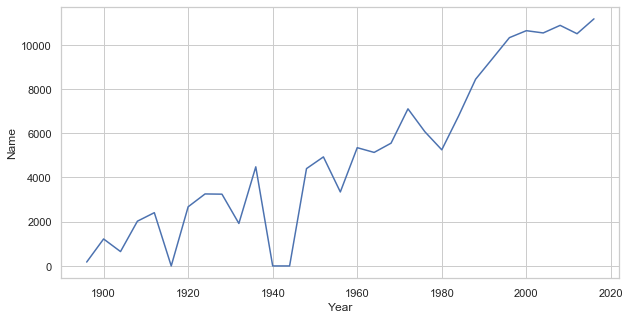

In [49]:
'''
為呈現每一次奧運的運動員人數的多少，可選用線圖。
seaborn提供的長條圖為lineplot
lineplot的x參數為比賽年度，y參數為運動員人數
'''
plt.figure(figsize=[10, 5])
ax = sns.lineplot(x="Year", y="Name", data=nathlete_year1)

Text(0.5, 1.0, '每一次夏季奧運會的運動員人數')

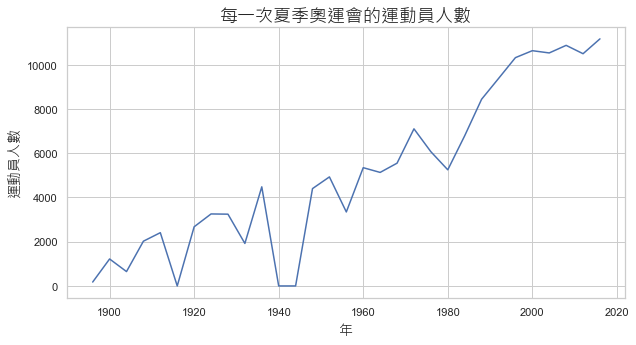

In [50]:
plt.figure(figsize=[10, 5])
ax = sns.lineplot(x="Year", y="Name", data=nathlete_year1)
# 加上圖形上的標題
ax.set_xlabel("年", fontproperties=han_font)
ax.set_ylabel("運動員人數", fontproperties=han_font)
ax.set_title('每一次夏季奧運會的運動員人數', fontproperties=han_font, fontsize=18)

([<matplotlib.axis.YTick at 0xc2e41d0>,
 <a list of 12 Text yticklabel objects>)

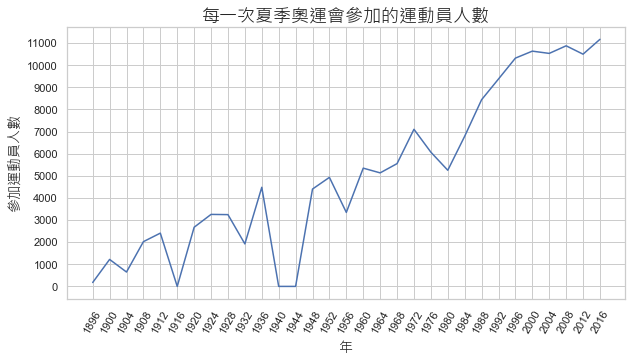

In [51]:
plt.figure(figsize=[10, 5])
ax = sns.lineplot(x="Year", y="Name", data=nathlete_year1)
ax.set_xlabel("年", fontproperties=han_font)
ax.set_ylabel("參加運動員人數", fontproperties=han_font)
ax.set_title('每一次夏季奧運會參加的運動員人數', fontproperties=han_font, fontsize=18)
# 將x軸的座標改以四年為間隔
plt.xticks(np.arange(1896, 2020, 4), rotation=60)
# 將y軸的座標改以1000為間隔
plt.yticks(np.arange(0, 12000, 1000))

**練習** 以線圖呈現「每一次夏季奧運會的比賽項目數」。
提示：比賽項目為Event，請利用Season選取夏季賽事後，依據年度(Year)分組後，計算不同比賽項目的個數。

4. 每一次夏季奧運會參加的男女運動員人數變化

In [71]:
# 先計算每一次夏季奧運會的男女運動員人數
'''
找出紀錄中賽事季節為"Summer"： data[data.Season=="Summer"]
以賽事年度與性別分組： groupby(["Year", "Sex"])
依據運動員姓名，計算不重複的次數： [["Name"]].nunique()
'''
nathlete_year = data[data.Season=="Summer"].\
groupby(["Year", "Sex"])[["Name"]].nunique().reset_index()

In [72]:
# 查看每一次夏季奧運會的男女運動員人數
nathlete_year

,Year,Sex,Name
0,1896,M,176
1,1900,F,23
2,1900,M,1197
3,1904,F,6
4,1904,M,644
5,1906,F,6
6,1906,M,835
7,1908,F,44
8,1908,M,1980
9,1912,F,53


In [73]:
# 將男女運動員人數的資料集依據性別展開，同一年度的資料放在同一筆記錄，
# 使男(M)與女(F)各成一個欄位
nathlete_year = nathlete_year\
.pivot(index='Year', columns='Sex', values='Name').reset_index()
# 查看每一次夏季奧運會的男女運動員人數
nathlete_year

Sex,Year,F,M
0,1896,NaN,176.0
1,1900,23.0,1197.0
2,1904,6.0,644.0
3,1906,6.0,835.0
4,1908,44.0,1980.0
5,1912,53.0,2356.0
6,1920,78.0,2597.0
7,1924,156.0,3100.0
8,1928,312.0,2934.0
9,1932,201.0,1721.0


In [74]:
# 產生每四年一次的序列
nathlete_year1 = pd.DataFrame(data={"Year": np.arange(1896, 2020, 4)})
# 與原先的男女運動員人數資料合併
nathlete_year1 = nathlete_year1.merge(nathlete_year, how="left", on=["Year"])
# 查看每一次夏季奧運會的男女運動員人數
nathlete_year1

,Year,F,M
0,1896,NaN,176.0
1,1900,23.0,1197.0
2,1904,6.0,644.0
3,1908,44.0,1980.0
4,1912,53.0,2356.0
5,1916,NaN,NaN
6,1920,78.0,2597.0
7,1924,156.0,3100.0
8,1928,312.0,2934.0
9,1932,201.0,1721.0


In [75]:
# 將展開的男女運動員人數，收納成一個欄位
nathlete_year1 = nathlete_year1.melt(id_vars='Year', value_vars=['F', 'M'])
# 查看每一次夏季奧運會的男女運動員人數
nathlete_year1 

,Year,variable,value
0,1896,F,NaN
1,1900,F,23.0
2,1904,F,6.0
3,1908,F,44.0
4,1912,F,53.0
...,...,...,...
57,2000,M,6576.0
58,2004,M,6252.0
59,2008,M,6284.0
60,2012,M,5858.0


In [76]:
# 如果運動員人數為Nan，便改為0
nathlete_year1.loc[nathlete_year1.value.isnull(), "value"]=0
# 查看每一次夏季奧運會的男女運動員人數
nathlete_year1

,Year,variable,value
0,1896,F,0.0
1,1900,F,23.0
2,1904,F,6.0
3,1908,F,44.0
4,1912,F,53.0
...,...,...,...
57,2000,M,6576.0
58,2004,M,6252.0
59,2008,M,6284.0
60,2012,M,5858.0


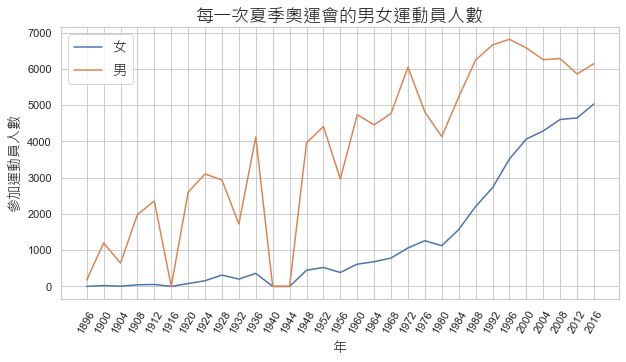

In [77]:
'''
以線圖呈現每一次夏季奧運會的男女運動員人數
並以不同顏色區別男與女運動員人數 (hue="variable")
'''
plt.figure(figsize=[10, 5])
ax = sns.lineplot(x="Year", y="value", hue="variable", data=nathlete_year1)
ax.set_xlabel("年", fontproperties=han_font)
ax.set_ylabel("參加運動員人數", fontproperties=han_font)
ax.set_title('每一次夏季奧運會的男女運動員人數', fontproperties=han_font, fontsize=18)
plt.xticks(np.arange(1896, 2020, 4), rotation=60)
ax.legend(labels=['女', '男'], prop=han_font)

5. 2016年奧運男女運動員人數比例

In [79]:
# 先計算2016年奧運男女運動員人數
'''
找出紀錄中賽事年度為2016： data[data.Year==2016]
以性別分組： groupby(["Sex"])
依據運動員姓名，計算不重複的次數： [["Name"]].nunique()
'''
nathlete_sex = data[data.Year==2016]\
.groupby(["Sex"])[["Name"]].nunique().reset_index()

# 查看2016年奧運男女運動員人數
nathlete_sex

,Sex,Name
0,F,5031
1,M,6143


Text(0.5, 1.0, '2016年夏季奧運會的男女運動員人數比')

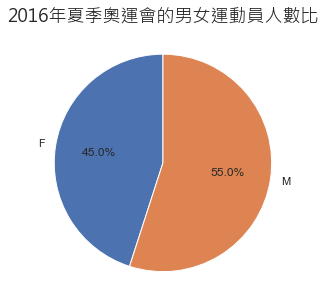

In [80]:
'''
seaborn沒有提供圓餅圖，需要利用matplotlib.pyplot的pie繪製
'''
plt.figure(figsize=[10, 5])
plt.pie(np.array(nathlete_sex.Name), labels=list(nathlete_sex.Sex),
        autopct='%1.1f%%', startangle=90)
plt.title('2016年夏季奧運會的男女運動員人數比', fontproperties=han_font, fontsize=18)

6. 2016年運動員的身高與體重

In [81]:
# 先選出2016年奧運每個運動員的姓名、性別、身高、體重
athlete = data[data.Year==2016][["Name", "Sex", "Height", "Weight"]]
athlete.head()

,Name,Sex,Height,Weight
80,Andreea Aanei,F,1.70,125.0
139,Nstor Abad Sanjun,M,1.67,64.0
140,Nstor Abad Sanjun,M,1.67,64.0
141,Nstor Abad Sanjun,M,1.67,64.0
142,Nstor Abad Sanjun,M,1.67,64.0


In [82]:
# 因為運動員可能報名多種賽事，所以先去除運動員的重複資料
athlete = athlete.drop_duplicates()
athlete.head()

,Name,Sex,Height,Weight
80,Andreea Aanei,F,1.70,125.0
139,Nstor Abad Sanjun,M,1.67,64.0
148,Antonio Abadia Beci,M,1.70,65.0
158,Giovanni Abagnale,M,1.98,90.0
161,Patimat Abakarova,F,1.65,49.0


In [83]:
# 去除沒有身高或體重資料的運動員
athlete = athlete.dropna()
athlete.head()

,Name,Sex,Height,Weight
80,Andreea Aanei,F,1.70,125.0
139,Nstor Abad Sanjun,M,1.67,64.0
148,Antonio Abadia Beci,M,1.70,65.0
158,Giovanni Abagnale,M,1.98,90.0
161,Patimat Abakarova,F,1.65,49.0


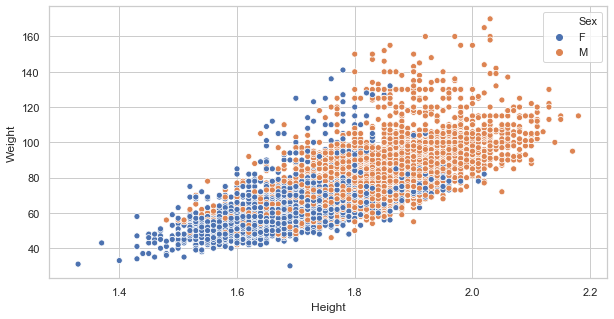

In [84]:
'''
為呈現運動員的身高與體重關連，可選用散佈圖。
seaborn提供的長條圖為scatterplot
scatterplot的x參數為身高，y參數為體重
另外，以不同顏色呈現不同性別的身高和體重情形，使hue="Sex"
'''
plt.figure(figsize=[10, 5])
sns.scatterplot(x="Height", y="Weight", hue="Sex", data=athlete)

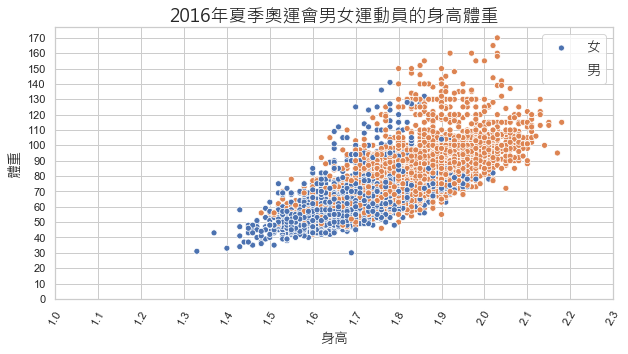

In [89]:
# 加上圖形上的標題，並將修改x軸與y軸的座標刻度
plt.figure(figsize=[10, 5])
ax = sns.scatterplot(x="Height", y="Weight", hue="Sex", data=athlete)
ax.set_xlabel("身高", fontproperties=han_font)
ax.set_ylabel("體重", fontproperties=han_font)
ax.set_title('2016年夏季奧運會男女運動員的身高體重', fontproperties=han_font, fontsize=18)
plt.xticks(np.arange(1.0, 2.4, 0.1), rotation=60)
plt.yticks(np.arange(0, 180, 10))
ax.legend(labels=["女", "男"], prop=han_font)

**練習** 以線圖呈現「2016年夏季奧運會運動員的年齡 vs. 體重」。